# Python Visulization of SpringSaLaD Outputs

This notebook demonstrates different ways visualize the CSV outputs generate by SpringSaLaD.

In [26]:
#Import necessary functions and data
from Visualization import *
from data_locator import data_file_finder
from display_info import *
from Project_reader import Describe_input_file
from MolDraw.MolDraw_exec import display_molecules

In [27]:
#Create the relative path to your desired SIMULATIONS or FOLDER directory
search_directory = os.path.join('Executable','Output','Simulation0_SIM_FOLDER')

#Get a description of the input file in that directory
Describe_input_file(search_directory, reactions=True, kinetics=True)

Moleclues:

MOLECULE: "R" (Initial Count: 5)
This molecule has 3 site types: R (2 possible states: State0, State1), L, Anchor

It consists of 4 connected sites:
Site 0 (Intracellular) of type "R"
Site 1 (Membrane) of type "Anchor"
Site 2 (Intracellular) of type "R"
Site 3 (Intracellular) of type "L"

It has 4 total links between sites:
Site 0 is connected to site 2, site 3
Site 1 is connected to site 3
Site 2 is connected to site 0, site 3
Site 3 is connected to site 1, site 0, site 2
------------------------------------------------------------------------------------------------------------

MOLECULE: "Adapter" (Initial Count: 5)
This molecule has 2 site types: A, L

It consists of 3 connected sites:
Site 0 (Intracellular) of type "A"
Site 1 (Intracellular) of type "L"
Site 2 (Intracellular) of type "A"

It has 2 total links between sites:
Site 0 is connected to site 1
Site 1 is connected to site 0, site 2
Site 2 is connected to site 1
-------------------------------------------------

R:


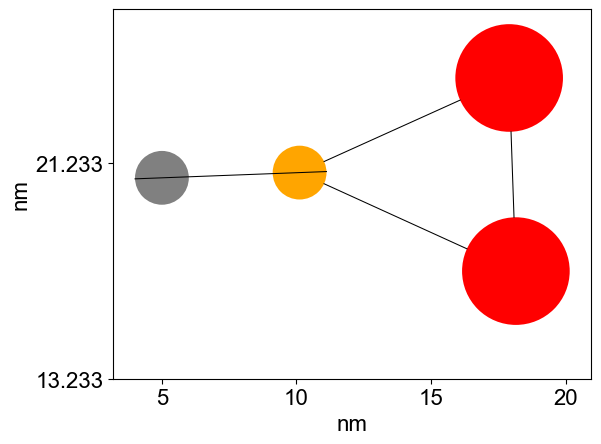

Adapter:


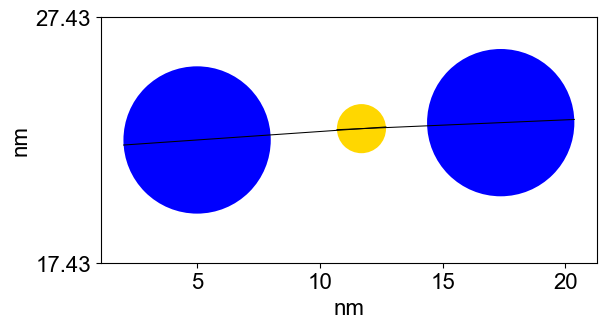

In [28]:
display_molecules(search_directory)

In [29]:
#Choose a file in the data folder by giving a search term (some part of the file name) or the full file name
path = data_file_finder(search_directory, ['data'], search_term='BondCounts', file_name=None)
file_info(path, list_neighbors=True)

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [30]:
#Plot the selected data over time
Plotter.plot(path)

#Get a list of columns and their respective indicies
column_info(path)

ValueError: Invalid file path or buffer object type: <class 'NoneType'>

In [31]:
#Select only the columns you want to see graphed
Plotter.plot(path, [1, 2, 5])

ValueError: Invalid file path or buffer object type: <class 'NoneType'>

In [22]:
#Change the data file
path = data_file_finder(search_directory, ['data'], 'MoleculeCounts')
column_info(path)
Plotter.plot(path, [3,6,9])

ValueError: Invalid file path or buffer object type: <class 'NoneType'>

Sites:
0: R of R
1: L of R
2: Anchor of R
3: A of Adapter
4: L of Adapter

List of indicies:
[0, 1, 2, 3, 4]


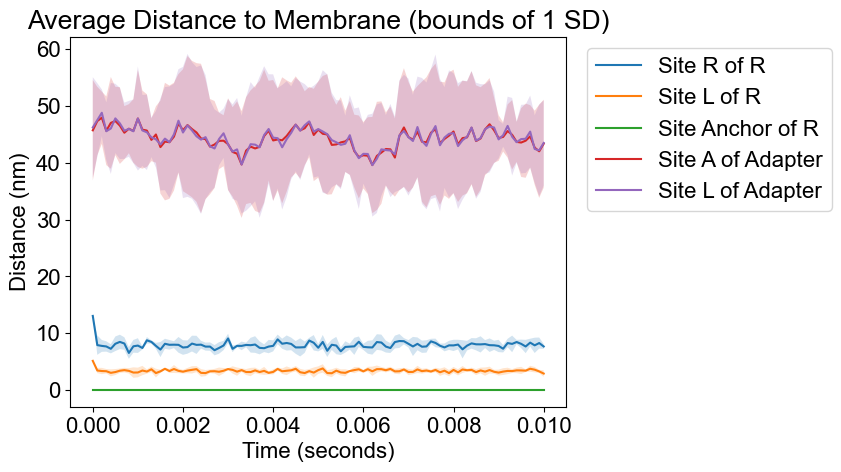

In [32]:
#Show the average Z position of each type of site (all corresponding to the same color)
Average_z_pos.plot(search_directory, indicies=[], verbose=True, legend_right=True, list_sites=True)

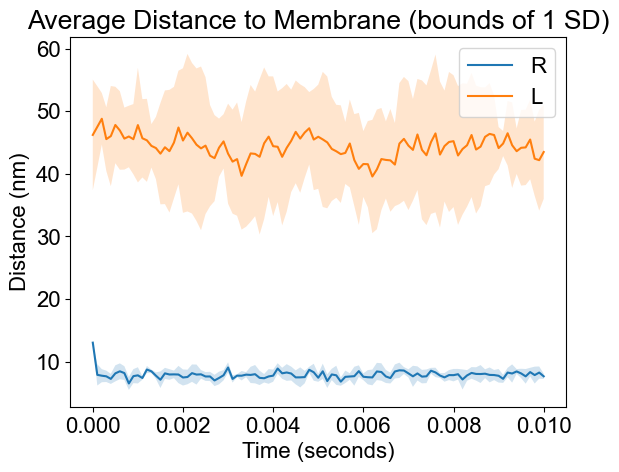

In [33]:
#Shorten legend with Verbose=False and set list_sites=False so only the graph is displayed
Average_z_pos.plot(search_directory, indicies=[0,4], verbose=False, legend_right=False, list_sites=False)


System:  Simulation0
Calculating Cluster Density ...
Progress : [****************************************] 100%


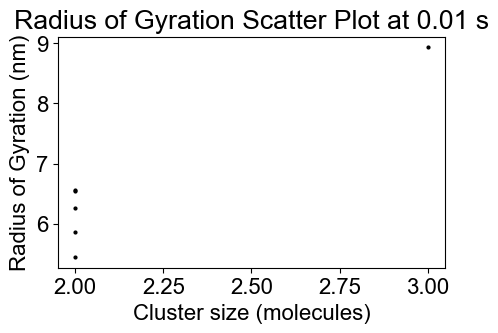

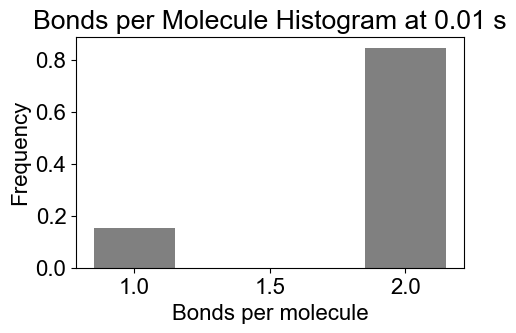

Execution time : 0.1939 secs


In [34]:
#View cluster size distribution (shows last data point by default)
Spatial_Analysis.plot(search_directory, times=[])


System:  Simulation0
Calculating Cluster Density ...
Progress : [********--------------------------------] 20%

Progress : [****************************************] 100%


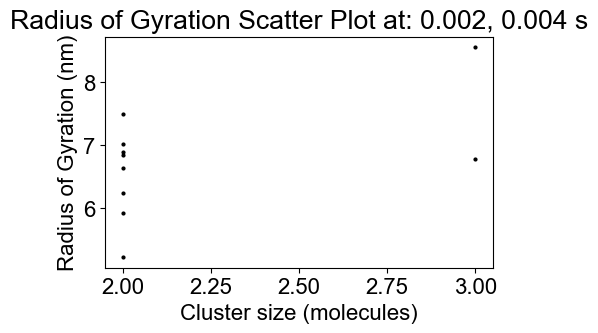

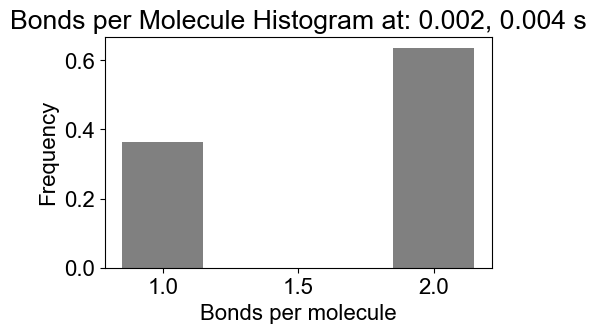

Execution time : 0.2042 secs


In [36]:
#Select a specific point in time
Spatial_Analysis.plot(search_directory, [0.002, 0.004])

In [37]:
#View cluster size distribution histogram at a particular point in time with or without bins
Histogram.plot(search_directory, [], 0.02)
Histogram.plot(search_directory, [1,5,10], 0.04)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Executable\\Output\\Simulation0_SIM_FOLDER\\data\\Cluster_stat\\Histograms\\Size_Freq_Fotm\\MEAN_Run'

In [38]:
Cluster_comp.plot(search_directory, 0.02)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Executable\\Output\\Simulation0_SIM_FOLDER\\data\\Cluster_stat\\Histograms\\Size_Comp_Freq\\MEAN_Run'

In [40]:
Bound_fraction.plot(search_directory, [0.002])

Class : CrossLinkIndex
System : Executable\Output\Simulation0_SIM_FOLDER\Simulation0_SIM.txt
Could not locate SiteIDs.csv across 0 runs
Could not locate SiteIDs.csv across 0 runs


TypeError: expected str, bytes or os.PathLike object, not NoneType

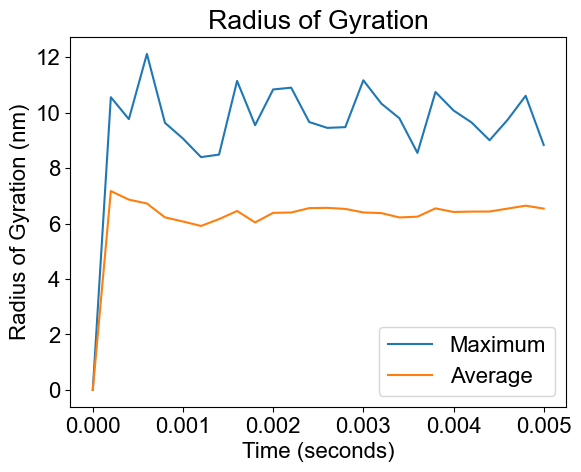

In [13]:
#data_selection options are 'rg' (cluster radius of gyration), 'cs' (cluster size or number of molecules in a cluster), and 'mr' (maximum cluster radius relative to cluster COM)
#indicies selects maximuim (0), average (1), or both in the plot below. It's both by default
#Warning: computationally intensive for larger simulations
Spatial_Analysis.time_course(search_directory, data_selection='rg', indicies=[0,1], size_threshold=1)

In [ ]:
Spatial_Analysis.time_course(search_directory, data_selection='cs', indicies=[0,1], size_threshold=1)

In [ ]:
Spatial_Analysis.time_course(search_directory, data_selection='mr', indicies=[0,1], size_threshold=1)